# Polars UwU

In [2]:
import polars as pl

## Series

In [3]:
serie = pl.Series(
    name="mi_serie",
    values=[1, 2, 3, 4, 5]
)
serie

mi_serie
i64
1
2
3
4
5


## Operaciones con series

In [4]:
print(
    serie.filter(
        serie > 3
    )
)

print(
    serie.filter(
        serie < 2
    )
)


print( f"El valor máximo de la serie es: {serie.max()}" )

shape: (2,)
Series: 'mi_serie' [i64]
[
	4
	5
]
shape: (1,)
Series: 'mi_serie' [i64]
[
	1
]
El valor máximo de la serie es: 5


## DataFrames

In [5]:
df = pl.DataFrame(
    {
        "Pokemon": ["Pikachu", "Charmander", "Squirtle", "Bulbausaur"],
        "Tipo 1": ["Electric", "Fire", "Water", "Grass"],
        "Tipo 2": [None, None, None, "Poision"],
        "HP": [35, 39, 44, 45],
    },
    schema = {
        "Pokemon": pl.Utf8,
        "Tipo 1": pl.Utf8,
        "Tipo 2": pl.Utf8,
        "HP": pl.Int32,
    }
)
df

Pokemon,Tipo 1,Tipo 2,HP
str,str,str,i32
"""Pikachu""","""Electric""",null,35
"""Charmander""","""Fire""",null,39
"""Squirtle""","""Water""",null,44
"""Bulbausaur""","""Grass""","""Poision""",45


In [6]:
# Simular que le pegaron al Pokemon, le bajaron 35 puntos de vida
df = df.with_columns(
    pl.col("HP") - 35,
)
df


Pokemon,Tipo 1,Tipo 2,HP
str,str,str,i32
"""Pikachu""","""Electric""",null,0
"""Charmander""","""Fire""",null,4
"""Squirtle""","""Water""",null,9
"""Bulbausaur""","""Grass""","""Poision""",10


In [7]:
# Agregar si está vivo o muerto
df = df.with_columns(
    pl.when( 
        pl.col("HP") > 0
    ).then(
        pl.lit("Vivo")
    ).otherwise(
        pl.lit("Muerto")
    ).alias("Estado")
)
df

Pokemon,Tipo 1,Tipo 2,HP,Estado
str,str,str,i32,str
"""Pikachu""","""Electric""",null,0,"""Muerto"""
"""Charmander""","""Fire""",null,4,"""Vivo"""
"""Squirtle""","""Water""",null,9,"""Vivo"""
"""Bulbausaur""","""Grass""","""Poision""",10,"""Vivo"""


In [8]:
# Columna para decir si es la mascota de Pokemon o no
df = df.with_columns(
    pl.when(
        pl.col("Pokemon") == "Pikachu"
    ).then(
        pl.lit(True)
    ).otherwise(
        pl.lit(False)
    ).alias("Es mascota")
)
df

Pokemon,Tipo 1,Tipo 2,HP,Estado,Es mascota
str,str,str,i32,str,bool
"""Pikachu""","""Electric""",null,0,"""Muerto""",true
"""Charmander""","""Fire""",null,4,"""Vivo""",false
"""Squirtle""","""Water""",null,9,"""Vivo""",false
"""Bulbausaur""","""Grass""","""Poision""",10,"""Vivo""",false


In [9]:
# Get column names
column_names = df.columns

# Print second column
print(df.select(column_names[1]))

shape: (4, 1)
┌──────────┐
│ Tipo 1   │
│ ---      │
│ str      │
╞══════════╡
│ Electric │
│ Fire     │
│ Water    │
│ Grass    │
└──────────┘


In [10]:
# Filtrado
## Ver que pokemones tiene mas de 5 HP
df.filter(
    pl.col("HP") > 5
)

Pokemon,Tipo 1,Tipo 2,HP,Estado,Es mascota
str,str,str,i32,str,bool
"""Squirtle""","""Water""",null,9,"""Vivo""",false
"""Bulbausaur""","""Grass""","""Poision""",10,"""Vivo""",false


In [11]:
df = pl.DataFrame({
    "a": [1, 2, 3, 4, 5],
    "b": [5, 4, 3, 2, 1],
})

# Operaciones aritméticas (suma de columnas)
df = df.with_columns(
    (pl.col("a") + pl.col("b")).alias("suma")
)

# Transformación: nueva columna con el logaritmo de "b"
df = df.with_columns(pl.col("b").log().alias("log_b"))

# Operación estadística (media de la columna "a")
mean_a = df.select(pl.col("a").mean()).to_numpy()

print(df)
print(mean_a)

shape: (5, 4)
┌─────┬─────┬──────┬──────────┐
│ a   ┆ b   ┆ suma ┆ log_b    │
│ --- ┆ --- ┆ ---  ┆ ---      │
│ i64 ┆ i64 ┆ i64  ┆ f64      │
╞═════╪═════╪══════╪══════════╡
│ 1   ┆ 5   ┆ 6    ┆ 1.609438 │
│ 2   ┆ 4   ┆ 6    ┆ 1.386294 │
│ 3   ┆ 3   ┆ 6    ┆ 1.098612 │
│ 4   ┆ 2   ┆ 6    ┆ 0.693147 │
│ 5   ┆ 1   ┆ 6    ┆ 0.0      │
└─────┴─────┴──────┴──────────┘
[[3.]]


## LazyFrames

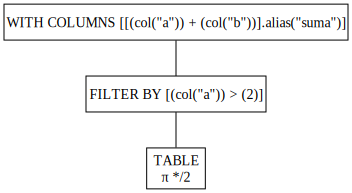

In [ ]:
# Crear un DataFrame en modo perezoso
df_lazy = pl.DataFrame({
   "a": [1, 2, 3, 4, 5],
   "b": [5, 4, 3, 2, 1]
}).lazy()

# Aplicar transformaciones (sin ejecutar aún)
df_transformed = df_lazy.filter(
    pl.col("a") > 2
).with_columns(
    (pl.col("a") + pl.col("b")).alias("suma")
)

# Al invocar collect(), las transformaciones se ejecutan
result = df_transformed

# Crear resultados
df_final = result.collect()
df_final

In [ ]:
# Crear un DataFrame en modo perezoso
df_lazy = pl.DataFrame({
   "x": [1, 2, 3, 4, 5],
   "y": [6, 7, 8, 9, 10]
}).lazy()

# Aplicar operaciones: filtrar y agregar columnas
df_result = df_lazy.filter(
    pl.col("x") > 2
).with_columns(
    (pl.col("x") * pl.col("y")).alias("multiplicacion")
)  # Multiplica las columnas 'x' y 'y'

# Ejecutar operaciones solo al llamar a collect()
df_result = df_result.collect()
df_result

In [29]:
# Crear un DataFrame con más columnas
df_lazy = pl.DataFrame({
   "nombre": ["Ana", "Luis", "Carlos", "Marta", "José"],
   "edad": [23, 34, 45, 28, 60],
   "ingresos_brutos": [2000, 3000, 4000, 5000, 6000]
}).lazy()

df_result = df_lazy.filter(
    pl.col("edad") > 30
).select(
    [
        pl.col("nombre"), 
        pl.col("ingresos_brutos").mean().alias("promedio_ingresos"),
        (pl.col("ingresos_brutos") * 0.16).alias("IVA")
    ]
)
df_result = df_result.collect()
print(df_result)

shape: (3, 3)
┌────────┬───────────────────┬───────┐
│ nombre ┆ promedio_ingresos ┆ IVA   │
│ ---    ┆ ---               ┆ ---   │
│ str    ┆ f64               ┆ f64   │
╞════════╪═══════════════════╪═══════╡
│ Luis   ┆ 4333.333333       ┆ 480.0 │
│ Carlos ┆ 4333.333333       ┆ 640.0 │
│ José   ┆ 4333.333333       ┆ 960.0 │
└────────┴───────────────────┴───────┘
